# Assignment 1 - Exercise Setup
This notebook contains the necessary code setup for the accompanying exercises. 

# 1. Coordinate Descent

In [3]:
import sympy as sp

# Define symbolic variables
x1, x2, x3 = sp.symbols('x1 x2 x3', real=True)

# Define the function
func = sp.exp(x1-3*x2+3) + sp.exp(3*x2-2*x3-2) + sp.exp(2*x3-x1+2)
def argmin_x1(x):
    df = sp.diff(func, x1)
    argmin = sp.solve(sp.Eq(df, 0), x1)[0]
    return float(argmin.subs(x))

def argmin_x2(x):
    df = sp.diff(func, x2)
    argmin = sp.solve(sp.Eq(df, 0), x2)[0]
    return float(argmin.subs(x))

def argmin_x3(x):
    df = sp.diff(func, x3)
    argmin = sp.solve(sp.Eq(df, 0), x3)[0]
    return float(argmin.subs(x))

def f(x):
    return float(func.subs(x))

def coordinate_descent(f, argmin, x0, max_iter=100, verbose=False):
    x = x0.copy()
    for i in range(max_iter):
        x[x1] = argmin[0](x)
        x[x2] = argmin[1](x)
        x[x3] = argmin[2](x)
        if verbose:
            print(f"iter {i+1:2d}: {tuple(x[s] for s in (x1,x2,x3))},  f = {f(x)}")
    return x, f(x)

x0 = {x1: 4, x2: 3, x3: 2}
print("argmin x1:", argmin_x1(x0))
print("argmin x2:", argmin_x2(x0))
print("argmin x3:", argmin_x3(x0))

x0 = {x1: 1, x2: 20, x3: 5}
print(x0)
argmins = [argmin_x1, argmin_x2, argmin_x3]
xf, fval = coordinate_descent(f, argmins, x0)
print("xf:", xf)
print("f(xf):", fval)

argmin x1: 6.0
argmin x2: 2.1666666666666665
argmin x3: 2.25
{x1: 1, x2: 20, x3: 5}
xf: {x1: 26.666666666666664, x2: 9.555555555555554, x3: 12.833333333333332}
f(xf): 8.154845485377136


# 2. Gradient Descent

In [4]:
def f(x):
    """Your code here"""

def gradient_descent(f, grad_f, eta, u0, v0, max_iter=100) -> tuple[list, list]:
    """Your code here"""

def eta_const(t,c=1e-3) -> float:
    """Your code here"""

def eta_sqrt(t,c=1e-3) -> float:
    """Your code here"""

def eta_multistep(t, milestones=[30, 80, 100], c=1e-3, eta_init=1e-3) -> float:
    """Your code here"""

# 3. Polynomial Regression

In [5]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the dataset
housing = fetch_california_housing(as_frame=True)

# The data is in a pandas DataFrame
df = housing.frame

# View the first few rows
df.head()
# print(housing.DESCR)    # This was used to get the answers to 3a

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# Let's separate features and target for clarity
features = df.drop(columns=["MedHouseVal"])
target = df["MedHouseVal"]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(scaled_features)

p = X_poly.shape[1]
print(p)

# Split the dataset (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

feature_names = features.columns

lin = LinearRegression()
lin.fit(X_train, y_train)

y_pred_val_lin = lin.predict(X_val)
mse_val_lin    = mean_squared_error(y_val, y_pred_val_lin)

coef_lin = dict(zip(feature_names, lin.coef_))

beta_MedInc   = coef_lin['MedInc']
beta_AveBeds  = coef_lin['AveBedrms']
beta_HouseAge = coef_lin['HouseAge']

print("Linear:")
print("  β_MedInc =", beta_MedInc)
print("  β_AveBedrms =", beta_AveBeds)
print("  β_HouseAge =", beta_HouseAge)
print("  MSE_val =", mse_val_lin)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)      # fit only on training
X_val_poly   = poly.transform(X_val)            # transform val

poly_feature_names = poly.get_feature_names_out(feature_names)

lin_poly = LinearRegression()
lin_poly.fit(X_train_poly, y_train)

y_pred_val_poly = lin_poly.predict(X_val_poly)
mse_val_poly    = mean_squared_error(y_val, y_pred_val_poly)

coef_poly = dict(zip(poly_feature_names, lin_poly.coef_))

beta_MedInc                 = coef_poly['MedInc']
beta_MedInc_AveBedrms       = coef_poly['MedInc AveBedrms']
beta_HouseAge_AveBedrms     = coef_poly['HouseAge AveBedrms']

print("\nPolynomial degree-2:")
print("  β_MedInc =", beta_MedInc)
print("  β_MedInc·AveBedrms =", beta_MedInc_AveBedrms)
print("  β_HouseAge·AveBedrms =", beta_HouseAge_AveBedrms)
print("  MSE_val =", mse_val_poly)

ridge = Ridge(alpha=0.0005, fit_intercept=True)   # 0.001 / 2
ridge.fit(X_train_poly, y_train)

y_pred_val_ridge = ridge.predict(X_val_poly)
mse_val_ridge    = mean_squared_error(y_val, y_pred_val_ridge)

coef_ridge = dict(zip(poly.get_feature_names_out(features.columns),
                      ridge.coef_))

β_MedInc                 = coef_ridge['MedInc']
β_MedInc_AveBedrms       = coef_ridge['MedInc AveBedrms']
β_HouseAge_AveBedrms     = coef_ridge['HouseAge AveBedrms']

print("\nRidge-regularised degree-2 model:")
print("  β_MedInc = ", β_MedInc)
print("  β_MedInc·AveBedrms = ", β_MedInc_AveBedrms)
print("  β_HouseAge·AveBedrms = ", β_HouseAge_AveBedrms)
print("  MSE_val = ", mse_val_ridge)

44
Linear:
  β_MedInc = 0.8523816881485087
  β_AveBedrms = 0.37113188284861864
  β_HouseAge = 0.12238223843286633
  MSE_val = 0.5558915986952441

Polynomial degree-2:
  β_MedInc = 0.9345365368688503
  β_MedInc·AveBedrms = -0.13113158971575667
  β_HouseAge·AveBedrms = 0.05718585617099915
  MSE_val = 0.46430152383011447

Ridge-regularised degree-2 model:
  β_MedInc =  0.9345367791251732
  β_MedInc·AveBedrms =  -0.13113136818489687
  β_HouseAge·AveBedrms =  0.05718627043285876
  MSE_val =  0.46430056436420913


# 4. Bias and Variance
You can calculate the results manually, or use whatever code you would like.

# 5. Naive Bayes

In [13]:
from sklearn.datasets import fetch_20newsgroups
categories = ['sci.space', 'misc.forsale', 'comp.graphics', 'rec.sport.hockey']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

print(train.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

=================   ==========
Classes                     20
Samples total            18846
Dimensionality               1

# 6. Decision Trees

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
print(df)
print(iris.DESCR)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

# 7. Support Vector Machines

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)

# Load digits dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
# print(digits.DESCR)

clf = SVC(kernel='rbf', gamma=0.0012, C=0.85)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("accuracy =", acc)

# labels of the support vectors
sv_labels = y_train[clf.support_]

# mask for digits 0 or 1
mask_01 = np.isin(sv_labels, [0, 1])

n_v = mask_01.sum()
print(n_v)

# The following code is for 7d
pair_row = 0 # the first row ((0,1) in our case) compares class 0 with class 1
pair_coefs = clf.dual_coef_[pair_row]   # values for every global SV
sv_indices = clf.support_ # map every global support-vector index back to its original sample
sv_labels  = y_train[sv_indices] # and label

mask_01 = (np.abs(pair_coefs) > 0) & np.isin(sv_labels, [0, 1]) # Create a mask, that keeps 
# non-zero a AND are labeled 0 or 1

indices_01   = sv_indices[mask_01]       # positions inside X_trains

print(f"# support vectors = {len(indices_01)}")

alphas_01 = pair_coefs[mask_01]
labels_01 = sv_labels[mask_01]
influence = np.abs(alphas_01)
top_indices = []
for digit in (0, 1):
    m       = labels_01 == digit
    idx     = indices_01[m]
    infl    = influence[m]
    order   = np.argsort(-infl)[:4]
    top_indices.extend(idx[order])

fig, axes = plt.subplots(2, 4, figsize=(8, 4))
fig.suptitle("Top-4 influential support vectors for digits 0 & 1", y=1.02)

for k, idx in enumerate(top_indices):
    ax = axes.flat[k]
    ax.imshow(X_train[idx].reshape(8, 8), cmap='gray', interpolation='nearest')
    ax.set_title(f"label {y_train[idx]}", fontsize=8)
    ax.axis('off')

plt.tight_layout()

accuracy = 0.9907407407407407
122
# support vectors = 62


62


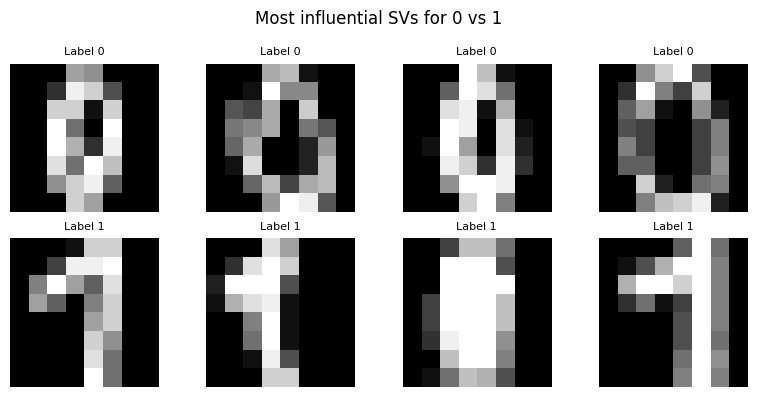

In [ ]:
# Following code is for 7c



mask_01    = (pair_coefs != 0) & np.isin(sv_labels, [0, 1])
infl       = np.abs(pair_coefs[mask_01])
labels_01  = sv_labels[mask_01]

print(len(labels_01))

# pick top-4 per class by influence
top_idx = []
for digit in (0, 1):
    ids   = indices_01[labels_01 == digit]
    inf   = infl[labels_01 == digit]
    top   = ids[np.argsort(-inf)[:4]]
    top_idx.extend(top)

# plot
fig, ax = plt.subplots(2, 4, figsize=(8, 4))
fig.suptitle("Most influential SVs for 0 vs 1")

for k, idx in enumerate(top_idx):
    img = X_train[idx].reshape(8, 8)
    ax.flat[k].imshow(img, cmap="gray")
    ax.flat[k].set_title(f"Label {y_train[idx]}", fontsize=8)
    ax.flat[k].axis("off")

plt.tight_layout()